# Machine Learning em Drug Discovery
Projeto de Data Science para auxiliar no processo de descoberta de novos medicamentos com Machine Learning.

## Um pouco sobre mim
Sou o Victor Yukio Shirasuna, estudante em Sistemas de Informação na Faculdade de Tecnologia da Unicamp. Desde adolescente vi o poder da programação, principalmente em jogos, mas me interessei ainda mais na área de Data Science e todo seu poder quando entrei na faculdade. Espero progredir nesta área e de Inteligência Artificial.

## 1. Levantamento das perguntas
* Esta etapa consiste na definição das principais perguntas a serem respondidas de acordo com o que será levantado na Pesquisa de Campo. Outras perguntas/hipóteses poderão surgir, conforme analisa-se os dados.
    
### 1.1 Pesquisa de Campo
##### O que é Drug Discovery?
> **Drug Discovery** ou Descoberta de Medicamentos é o processo pelo qual novos medicamentos em potencial são identificados. Envolve uma ampla gama de disciplinas científicas, incluindo biologia, química e farmacologia. (NATURE PORTFOLIO)

##### O que é expressão gênica?
> A **expressão génica** é o processo pelo qual a informação hereditária contida em um gene, tal como a sequência de DNA, é utilizada de modo a formar um produto génico funcional, tal como proteínas ou RNA. (WIKIPÉDIA)

##### O que é viabilidade celular?
> A **viabilidade celular**, definida como o número de células saudáveis em uma amostra, determina a quantidade de células (independentemente da fase em torno do ciclo celular) que estão vivas ou mortas, com base em uma amostra total de células. (MAY, Olivia L.)

##### O que é MoA (Mechanism of Action)?
> O **mecanismo de ação** descreve o processo pelo qual uma molécula, como um medicamento, funciona para produzir um efeito farmacológico. O mecanismo de ação de uma droga pode se referir aos seus efeitos em uma leitura biológica, como o crescimento celular, ou sua interação e modulação de seu alvo biomolecular direto, por exemplo, uma proteína ou ácido nucleico. (NATURE PORTFOLIO.)
   
### 1.2 Lista de perguntas
   - [ ] 1.Quantas características de **expressões gênicas** foram monitoradas ao todo?
   - [ ] 2.Quantas características de **viabilidade celular** foram monitoradas ao todo?
   - [ ] 3.Quantos tipos de **drogas/compostos** foram utilizadas no experimento?
   - [ ] 4.Qual o número de **MoA's** de cada registro?
   - [ ] 5.O **MoA** de cada registro foi ativado ou não?

##### Referências
   * DESCONHECIDO. Drug discovery: passado, presente e futuro. Disponível em: https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit. Acesso em: 6 maio 2021.
   * DESCONHECIDO. Expressão gênica: o caminho da informação biológica. Disponível em: https://docs.google.com/document/d/1TR-Q1cb2k_-S_MZC-60PMN2CbVGZbLMKT0Lr_didPY0/edit. Acesso em: 6 maio 2021.
   * NATURE PORTFOLIO. Drug discovery. Disponível em: https://www.nature.com/subjects/drug-discovery. Acesso em: 7 maio 2021.
   * NATURE PORTFOLIO. Mechanism of action. Disponível em: https://www.nature.com/subjects/mechanism-of-action. Acesso em: 7 maio 2021.
   * WIKIPÉDIA. Expressão génica. Disponível em: https://pt.wikipedia.org/wiki/Express%C3%A3o_g%C3%A9nica. Acesso em: 7 maio 2021.
   * MAY, Olivia L.. Determining Cell Vitality​. Disponível em: https://www.caymanchem.com/news/determining-cell-vitality. Acesso em: 7 maio 2021.

## 2. Coleta dos Dados
* Os dados foram coletados a partir de um Fork do [repositório no Github do Desafio Final Imersão Dados da Alura](https://github.com/alura-cursos/imersao-dados-desafio-final). A pasta Dados contém tanto os dados de **experimento** quanto os de **resultados**.

In [1]:
### Importação das bibliotecas para manipulação e visualização das bases de dados ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [2]:
### Importando a base de dados de experimentos ###
dataset = pd.read_csv('https://github.com/vichShir/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression='zip')
dataset.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
### Importando a base de dados de resultados ###
dataset_results = pd.read_csv('https://github.com/vichShir/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Processamento e Organização dos Dados
* Com as bases de dados coletadas, será preciso realizar o devido tratamento a partir da padronização, limpeza, processamento e organização das informações para o escopo geral do projeto.

### 3.1.1 Verificando as Colunas do Dataset de Experimentos

In [4]:
### Verificando as colunas existentes do dataset ###
colunas_dataset = dataset.columns
colunas_dataset

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [5]:
### Determinando a quantidade de colunas do dataset ###
print('Dataset de experimentos contém ao todo: {} colunas.'.format(len(colunas_dataset)))

Dataset de experimentos contém ao todo: 877 colunas.


**Visualizando as colunas do dataset de experimentos, percebemos um possível padrão entre as colunas de expressões gênicas e de viabilidade celular, que seguem a possível ordem de g-0 até g-x e c-0 até c-x. Vamos averiguar isso melhor:**

In [6]:
### Determinando a quantidade de colunas de expressões gênicas (g-x) ###
quantidade_g = 0

for coluna in colunas_dataset:
    if 'g-' in coluna:
        quantidade_g += 1
        
print('Das quais, {} representam a expressão gênica.'.format(quantidade_g))

Das quais, 772 representam a expressão gênica.


**Sabemos, portanto que, as expressões gênicas estão numeradas de g-0 até g-771**
* [X] 1.Quantas características de **expressões gênicas** foram monitoradas ao todo?

In [7]:
### Determinando a quantidade de colunas de viabilidade celular (c-x) ###
quantidade_c = 0

for coluna in dataset.columns:
    if 'c-' in coluna:
        quantidade_c += 1
        
print('E {} representam a viabilidade celular.'.format(quantidade_c))

E 100 representam a viabilidade celular.


**Sabemos, portanto que, as viabilidades celulares estão numeradas de c-0 até c-99**
* [X] 2.Quantas características de **viabilidade celular** foram monitoradas ao todo?

**E as outras 5 colunas são id, tratamento, tempo, dose e droga. Ou seja, o dataset de experimentos é composto, principalmente pelas informações gerais do registro, que são o id, tratamento, tempo, dose e droga, juntamente com as expressões gênicas e as viabilidades celulares.**

### 3.1.2 Verificando as Colunas do Dataset de Resultados

In [8]:
### Verificando as colunas existentes do dataset ###
colunas_dataset_results = dataset_results.columns
colunas_dataset_results

Index(['id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [9]:
### Determinando a quantidade de colunas do dataset ###
print('Dataset de resultados contém ao todo: {} colunas.'.format(len(colunas_dataset_results)))

Dataset de resultados contém ao todo: 207 colunas.


**Aparentemente, as colunas não são esquematizadas como o dataset de experimentos. Afinal, este dataset de resultados parece representar os Mecaninsmos de Ação.**

### 3.2.1 Verificando os Registros do Dataset de Experimentos (linhas)

In [10]:
### Contar a quantidade de registros do dataset ###
# Se a coluna id representa o identificador de cada registro, pressumi-se que este seja o valor total de linhas
print('Dataset de experimentos tem {} linhas.'.format(dataset['id'].value_counts().sum()))

Dataset de experimentos tem 23814 linhas.


In [11]:
### Determinar quantos valores nulos existem no dataset ###

# Quantidade dos valores nulos totais do dataset
qtd_valores_null = 0

# Somar a quantidade de valores nulos de cada coluna na variável de controle
for coluna in colunas_dataset:
    qtd_valores_null += dataset[coluna].isnull().sum()

print('Existem ao todo: {} valores nulos no dataset de experimentos'.format(qtd_valores_null))

Existem ao todo: 0 valores nulos no dataset de experimentos


**Deste modo, todos os registros do dataset estão completos e não há dados ausentes. O que viabiliza a análise e predição mais detalhada e apurada posteriormente.**

### 3.2.2 Verificando os Registros do Dataset de Resultados (linhas)

In [12]:
### Contar a quantidade de registros do dataset ###
# Se a coluna id representa o identificador de cada registro, pressumi-se que este seja o valor total de linhas
print('Dataset de resultados tem {} linhas.'.format(dataset_results['id'].value_counts().sum()))

Dataset de resultados tem 23814 linhas.


In [13]:
### Determinar quantos valores nulos existem no dataset ###

# Quantidade dos valores nulos totais do dataset
qtd_valores_null = 0

# Somar a quantidade de valores nulos de cada coluna na variável de controle
for coluna in dataset_results:
    qtd_valores_null += dataset_results[coluna].isnull().sum()

print('Existem ao todo: {} valores nulos no dataset de resultados'.format(qtd_valores_null))

Existem ao todo: 0 valores nulos no dataset de resultados


**É possível notar que, a quantidade de registros de ambos os datasets são iguais (23814 linhas) e possuem a mesma coluna id. Possivelmente, ambas podem se relacionar através desta coluna que é o identificador, posteriormente.**

### 3.3.1 Tratamento do Dataset de Experimentos

In [14]:
### Apenas renomear a coluna droga para composto ###

# Renomear as colunas com DICIONÁRIO E .RENAME
mapa = {'droga': 'composto'}
dataset.rename(columns=mapa, inplace=True)

In [15]:
### Dataset de Experimentos Final ###
dataset.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### 3.3.2 Tratamento do Dataset de Experimentos
**Não será preciso realizar algum tratamento do dataset de resultados, acredita-se que o mesmo já está padronizado, organizado e não há dados ausentes.**

In [16]:
### Dataset de Resultados Final ###
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Análise de Dados/Análise Exploratória

### 4.1 Informações Gerais

In [17]:
dataset.shape

(23814, 877)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [19]:
dataset.dtypes

id             object
tratamento     object
tempo           int64
dose           object
composto       object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

In [20]:
### Variável contendo a tabela describe das expressões gênicas ###
g_describe = dataset.loc[:, 'g-0':'g-771'].describe()
g_describe

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

In [21]:
### Variável contendo a tabela describe das viabilidades celulares ###
c_describe = dataset.loc[:, 'c-0':'c-99'].describe()
c_describe

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,-0.486027,-0.473410,-0.508091,-0.510905,-0.306528,-0.452293,-0.337267,-0.473728,-0.619461,-0.330389,-0.454165,-0.496059,-0.383134,-0.295655,-0.443384,-0.449683,-0.597730,-0.431899,-0.501831,-0.288958,-0.385486,-0.434420,-0.322990,-0.545691,-0.461527,-0.350457,-0.477049,-0.209301,-0.598003,-0.397430,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,2.066695,2.058766,2.140051,2.170919,1.575507,1.974010,1.594663,2.079550,2.294899,1.641563,2.001374,2.023053,1.690235,1.536784,1.967079,1.899095,2.268931,1.916467,1.904629,1.521773,1.741182,1.988458,1.772399,2.201552,1.974772,1.751440,1.965178,1.287766,2.297375,1.838205,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.910000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,-0.564000,-0.546475,-0.555500,

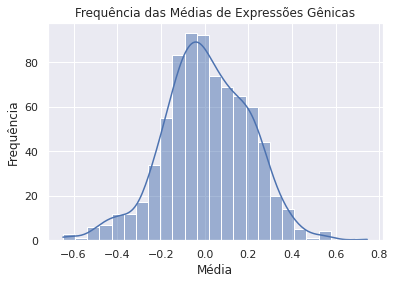

In [22]:
### Analisando a frequência das médias das expressões gênicas ###
sns.histplot(data=g_describe.T, x='mean', kde=True)

plt.title('Frequência das Médias de Expressões Gênicas')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

**Nota-se que maior concentração dos dados das médias das expressões gênicas, encontra-se entre -0.2 a ~0.1. Ou seja, grande parte dos valores de expressões gênicas registrados encontram-se dentro desse intervalo, parecendo ser um histograma do tipo simétrico.**

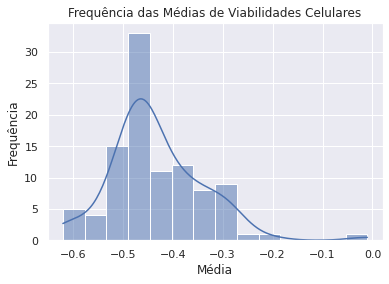

In [23]:
### Analisando a frequência das médias das viabilidades celulares ###
sns.histplot(data=c_describe.T, x='mean', kde=True)

plt.title('Frequência das Médias de Viabilidades Celulares')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

**Nota-se que maior concentração dos dados das médias das viabilidades celulares, encontra-se entre -0.5 a -0.3. Ou seja, grande parte dos valores de viabilidade celular registrados encontram-se dentro desse intervalo, parecendo ser um histograma do tipo enviesado para a direita.**

### 4.2 Colunas

In [24]:
dataset['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [25]:
dataset['tempo'].unique()

array([24, 72, 48])

In [26]:
dataset['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [27]:
dataset['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [28]:
print('Há {} tipos de compostos.'.format(len(dataset['composto'].unique())))

Há 3289 tipos de compostos.


- [X] 3.Quantos tipos de **drogas/compostos** foram utilizadas no experimento?

In [29]:
dataset['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

* Obs: Parece que os valores das **expressões gênicas** são **valores contínuos**

In [30]:
dataset['c-0'].unique()

array([-0.06  ,  0.0927, -0.1312, ...,  0.3509,  0.9538, -2.389 ])

* Obs: Parece que os valores das **viabilidades celulares** são **valores contínuos**

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


**Confirmando que a quantidade de expressões gênicas (772) + a quantidade de viabilidades celulares (100) são valores contínuos (float), enquanto os demais são objetos (string) e o tempo que é inteiro (int).**

In [32]:
dataset['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [33]:
dataset['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

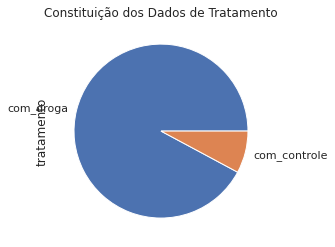

In [34]:
dataset['tratamento'].value_counts().plot.pie()

plt.title('Constituição dos Dados de Tratamento')
plt.show()

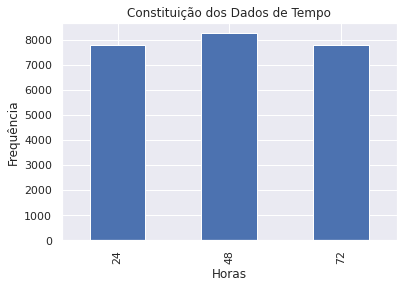

In [35]:
dataset['tempo'].value_counts().sort_index().plot.bar()

plt.title('Constituição dos Dados de Tempo')
plt.xlabel('Horas')
plt.ylabel('Frequência')
plt.show()

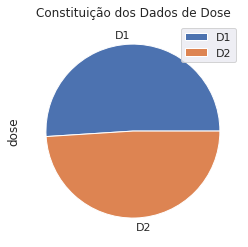

In [36]:
dataset['dose'].value_counts().plot.pie()
plt.legend(loc='best')
plt.title('Constituição dos Dados de Dose')
plt.show()

**Descobriu-se mais a respeito das colunas, quais são os 5 principais compostos?**

In [37]:
### COLETAR OS CÓDIGOS DOS 5 PRIMEIROS COMPOSTOS ###
cod_compostos = dataset['composto'].value_counts().sort_values(ascending=False).index[:5]

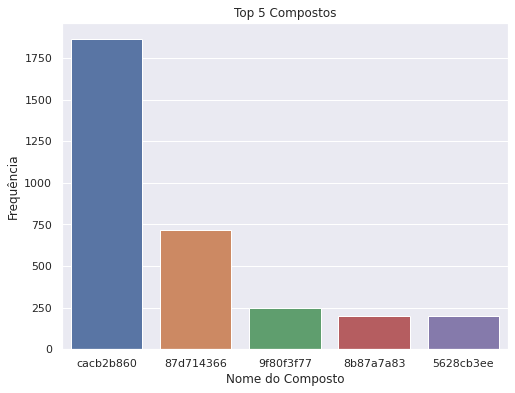

In [38]:
### GRÁFICO TOP 5 COMPOSTOS ###
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', 
                   data=dataset.query('composto in @cod_compostos'),
                   order=cod_compostos)
ax.set_title('Top 5 Compostos')
plt.xlabel('Nome do Composto')
plt.ylabel('Frequência')
plt.show()

### 4.3 Explorando as Expressões Gênicas e Viabilidades Celulares

#### 4.3.1 Expressões Gênicas

In [39]:
### VISUALIZANDO OS VALORES UNICOS, MIN E MAX DE G-0 ###
print(len(dataset['g-0'].unique()))
print(dataset['g-0'].min())
print(dataset['g-0'].max())

14367
-5.513
10.0


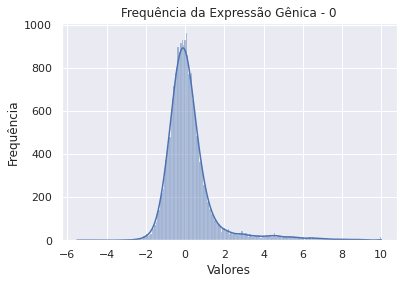

In [40]:
### HISTOGRAMA G-0 ###
sns.histplot(data=dataset['g-0'], kde=True)

plt.title('Frequência da Expressão Gênica - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

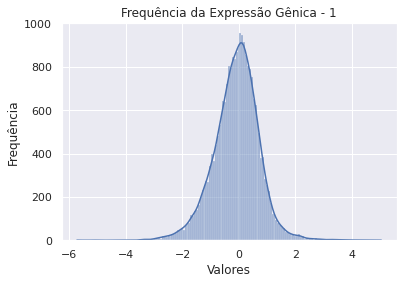

In [41]:
### HISTOGRAMA G-1 ###
sns.histplot(data=dataset['g-1'], kde=True)

plt.title('Frequência da Expressão Gênica - 1')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

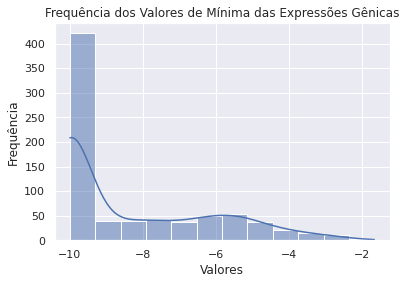

In [42]:
### HISTOGRAMA DAS MÍNIMAS DAS EXPRESSÕES GÊNICAS ###
sns.histplot(data=g_describe.T, x='min', kde=True)

plt.title('Frequência dos Valores de Mínima das Expressões Gênicas')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

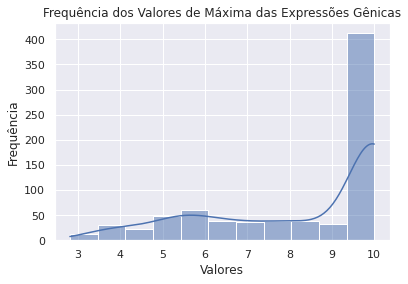

In [43]:
# HISTOGRAMA DAS MÁXIMAS DAS EXPRESSÕES GÊNICAS ###
sns.histplot(data=g_describe.T, x='max', kde=True)

plt.title('Frequência dos Valores de Máxima das Expressões Gênicas')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [44]:
g_describe.T['min'].sort_values(ascending=True)[0]

-10.0

In [45]:
g_describe.T['max'].sort_values(ascending=False)[0]

10.0

**Nota-se que, a partir desses gráficos, os valores de expressões gênicas têm um intervalo aparente de -10 e 10. Possivelmente, estes dados foram padronizados.**

#### 4.3.2 Viabilidades Celulares

In [46]:
### VISUALIZANDO OS VALORES UNICOS, MIN E MAX DE C-0 ###
print(len(dataset['c-0'].unique()))
print(dataset['c-0'].min())
print(dataset['c-0'].max())

14421
-10.0
3.365


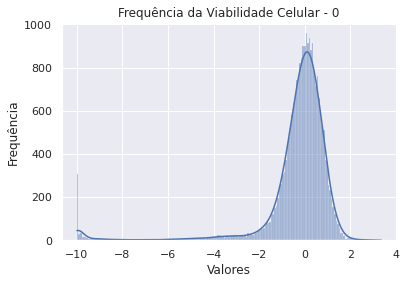

In [47]:
### HISTOGRAMA C-0 ###
sns.histplot(data=dataset['c-0'], kde=True)

plt.title('Frequência da Viabilidade Celular - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

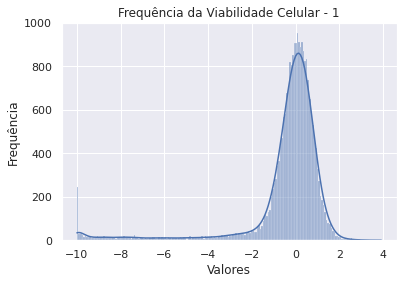

In [48]:
### HISTOGRAMA C-1 ###
sns.histplot(data=dataset['c-1'], kde=True)

plt.title('Frequência da Viabilidade Celular - 1')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

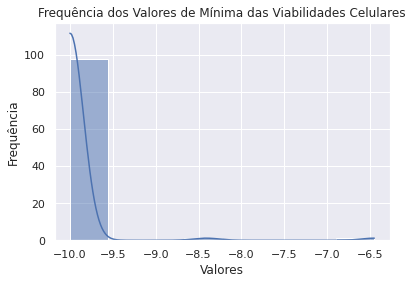

In [49]:
### HISTOGRAMA DAS MÍNIMAS DAS VIABILIDADES CELULARES ###
sns.histplot(data=c_describe.T, x='min', kde=True)

plt.title('Frequência dos Valores de Mínima das Viabilidades Celulares')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

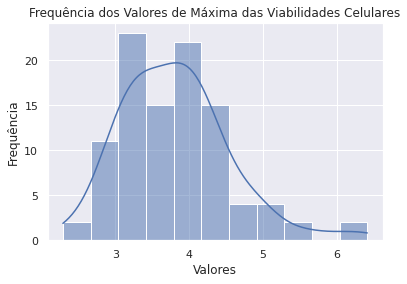

In [50]:
# HISTOGRAMA DAS MÁXIMAS DAS VIABILIDADES CELULARES ###
sns.histplot(data=c_describe.T, x='max', kde=True)

plt.title('Frequência dos Valores de Máxima das Viabilidades Celulares')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [51]:
c_describe.T['max'].sort_values(ascending=False)[0]

6.412000000000001

**Nota-se, a partir desses gráficos, que os valores de viabilidades celulares parecem seguir o mesmo intervalo aparente das expressões gênicas.**
\
\
**Contudo, a máxima foi de 6.41 e não até 10. Pode ser que as viabilidades celulares estejam também padronizadas de -10 e 10, porém não houveram ocorrências de máxima, seja talvez por uma questão da área de negócio.**
\
\
**Ou, simplesmente, a maior concentração dos dados de máxima está situada "longe" do possível limite máximo. Observa-se que o gráfico tende a ser simétrico, ao invés de ser enviesado à direita.**

### 4.4 Distribuições com Boxplot

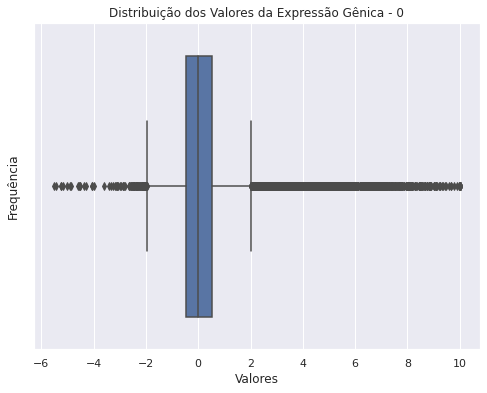

In [52]:
### BOXPLOT DO GENE G-0 ###
plt.figure(figsize=(8,6))
sns.boxplot(x='g-0', data=dataset)

plt.title('Distribuição dos Valores da Expressão Gênica - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

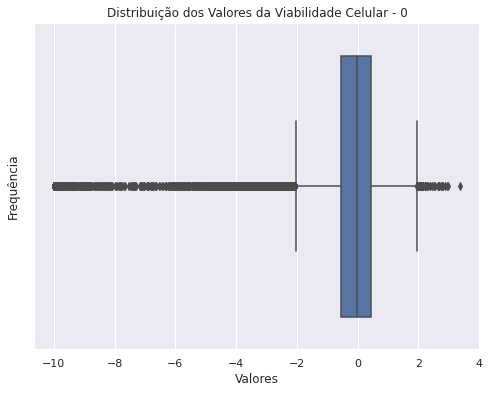

In [53]:
### BOXPLOT DO GENE C-0 ###
plt.figure(figsize=(8,6))
sns.boxplot(x='c-0', data=dataset)

plt.title('Distribuição dos Valores da Viabilidade Celular - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

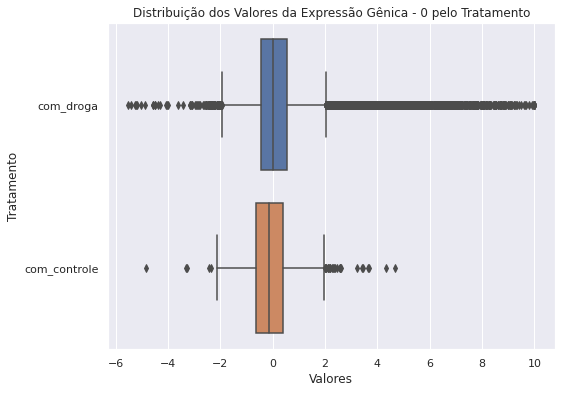

In [54]:
### BOXPLOT DO GENE G-0 DE ACORDO COM TRATAMENTO ###
plt.figure(figsize=(8,6))
sns.boxplot(x='g-0', y='tratamento', data=dataset)

plt.title('Distribuição dos Valores da Expressão Gênica - 0 pelo Tratamento')
plt.xlabel('Valores')
plt.ylabel('Tratamento')
plt.show()

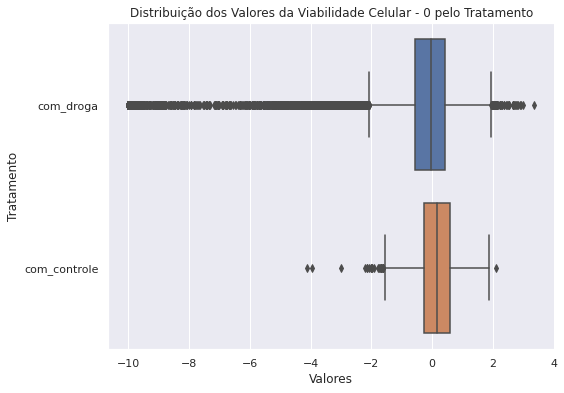

In [55]:
### BOXPLOT DE C-0 DE ACORDO COM TRATAMENTO ###
plt.figure(figsize=(8,6))
sns.boxplot(x='c-0', y='tratamento', data=dataset)

plt.title('Distribuição dos Valores da Viabilidade Celular - 0 pelo Tratamento')
plt.xlabel('Valores')
plt.ylabel('Tratamento')
plt.show()

### 4.5 Seleção de dados Tratamento e Dose

In [56]:
### AGRUPAMENTO DE TRATAMENTO E DOSE ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [57]:
### DADOS NORMALIZADOS ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [58]:
### NORMALIZADOS PELA LINHA (INDEX) ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [59]:
### AGRUPAMENTO DE TRATAMENTO E DOSE PELA MÉDIA ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], values=dataset['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

**Observa-se que a composição de dados com_controle é bem menor do que a com_droga. Talvez haja uma explicação estatística para isso, como na amostragem. Em contrapartida, os dados de dose estão bem equilibrados.**

### 4.6 Gráficos de Dispersão

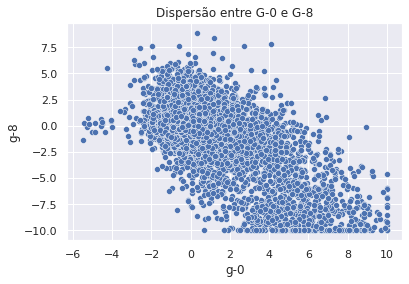

In [60]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 ###
sns.scatterplot(x='g-0', y='g-8', data=dataset)

plt.title('Dispersão entre G-0 e G-8')
plt.show()

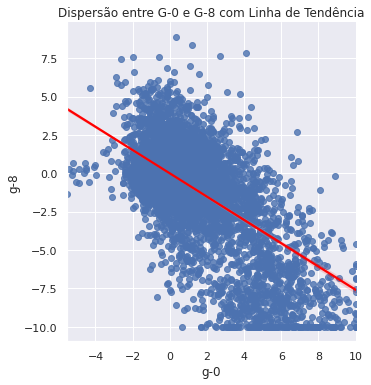

In [61]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'})

plt.title('Dispersão entre G-0 e G-8 com Linha de Tendência')
plt.show()

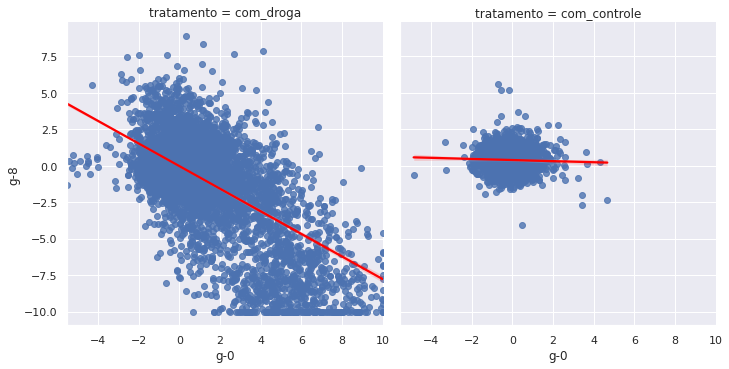

In [62]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA DE ACORDO COM O TRATAMENTO ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento')
plt.show()

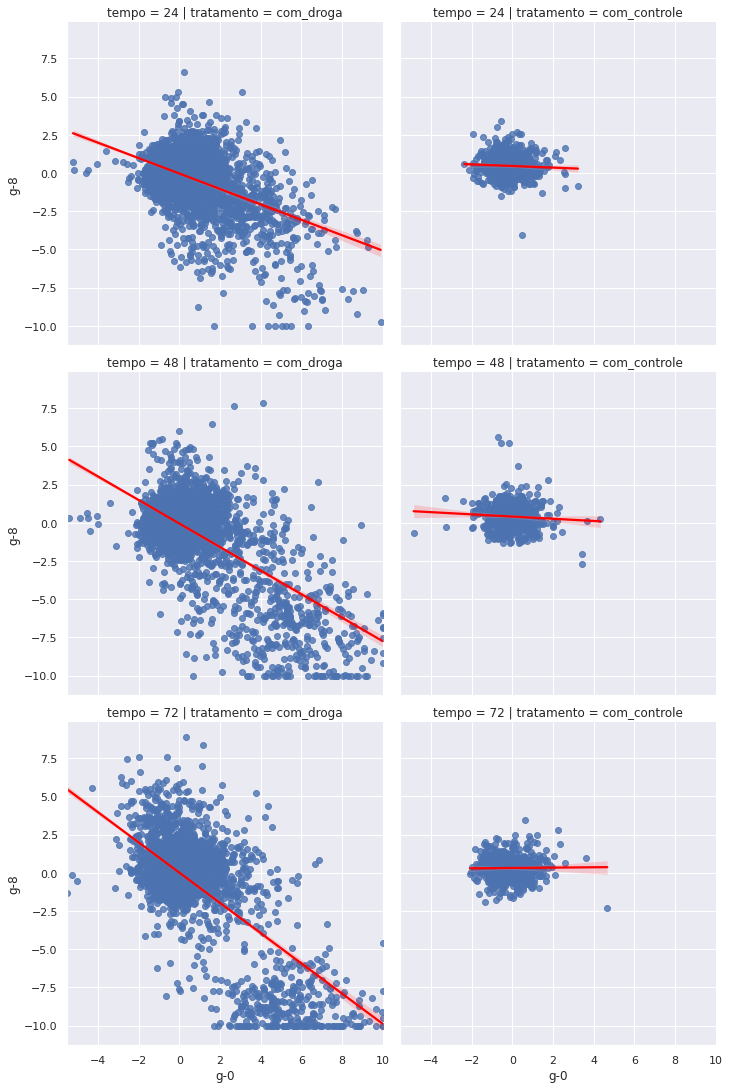

In [63]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA DE ACORDO COM O TRATAMENTO E TEMPO ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

### 4.7 Correlação

#### 4.7.1 Expressões Gênicas

In [64]:
### CORRELAÇÃO ENTRE AS 50 PRIMEIRAS EXPRESSÕES GÊNICAS ###
corr_gene = dataset.loc[:, 'g-0':'g-50'].corr()
corr_gene.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675


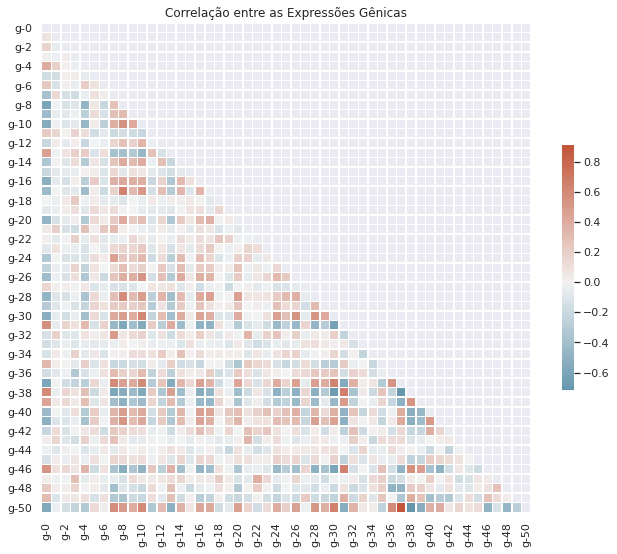

In [65]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_gene, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gene, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as Expressões Gênicas')
plt.show()

**A correlação entre as 50 primeiras expressões gênicas é diversificada e aparenta ser fraca. Há alguns pontos onde a correlação é maior, por exemplo, entre, mais ou menos, g-36 a g-37 com g-50.** <br><br>
**Assim, deduz-se que as expressões gênicas, no geral, são independentes umas das outras.**

#### 4.7.2 Viabilidades Celulares

In [66]:
### CORRELAÇÃO ENTRE AS 50 PRIMEIRAS VIABILIDADES CELULARES ###
corr_celular = dataset.loc[:, 'c-0':'c-50'].corr()
corr_celular.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,0.904528,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843


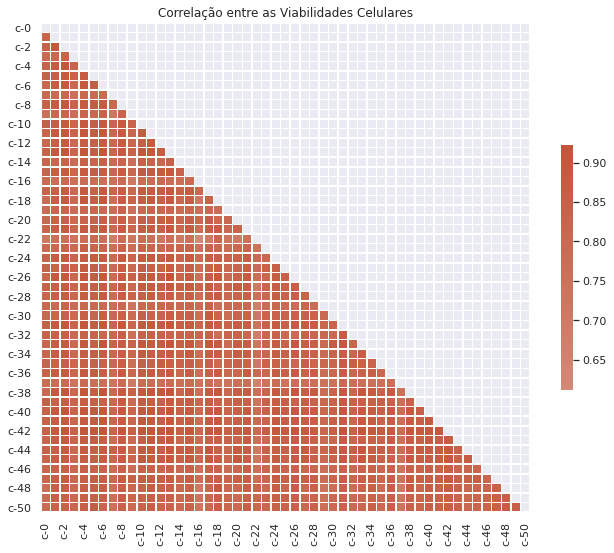

In [67]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as Viabilidades Celulares')
plt.show()

**A correlação entre as 50 primeiras viabilidades celulares é bem maior que as expressões gênicas. Percebe-se, praticamente, que o gráfico todo está destacado, até porque o intervalo de correlação é menor, mas possui valores altos de correlação.** <br><br>
**Pode ser que as viabilidades celulares se correlacionem, mas no entanto, não quer dizer que há um efeito de causalidade entre elas.**

### 4.8 Analisando Tabela de Resultados

In [68]:
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
### ANALISANDO OS VALORES DA COLUNA ###
dataset_results['acat_inhibitor'].unique()

array([0, 1])

In [70]:
### ANALISANDO OS VALORES DA COLUNA ###
dataset_results['acetylcholine_receptor_agonist'].unique()

array([0, 1])

**Parece que cada coluna após o id representa um Mecanismo de Ação (MoA) e cada linha, se esse mecanismo foi ativado ou não, representado por 1 ou 0, respectivamente.**

In [71]:
### Contagem do Mecanismo de Ativação ###
contagem_moa = dataset_results.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

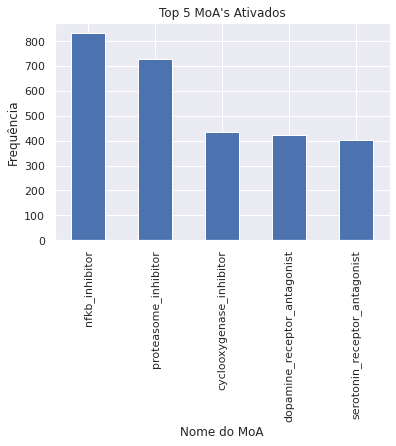

In [72]:
### GRÁFICO TOP 5 MOA'S ATIVADOS ###
contagem_moa[:5].plot.bar()

plt.title("Top 5 MoA's Ativados")
plt.xlabel('Nome do MoA')
plt.ylabel('Frequência')
plt.show()

### 4.9 Cruzamento de Dados de Experimento com tabela de Resultados

In [73]:
### Numero de MOA ativos (Por Registro) ###
dataset_results.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

- [X] 4.Qual o número de **MoA's** de cada registro?

In [74]:
### Criar coluna com Numero de MOA ###
dataset_results['n_moa'] = dataset_results.drop('id', axis=1).sum(axis=1)

In [75]:
### Criar coluna Se foi Ativo MOA ###
dataset_results['ativo_moa'] = (dataset_results['n_moa'] != 0)
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


- [X] 5.O **MoA** de cada registro foi ativado ou não?

In [76]:
### Combinar as 2 Tabelas de acordo com o ID ###
dataset_merged = pd.merge(dataset, dataset_results[['id', 'n_moa', 'ativo_moa']], on='id')
dataset_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [77]:
### Vendo se os Com Controle não possuem Ativo do Composto ###
dataset_merged.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [78]:
### Vendo se alguma Com Droga não Ativou o Composto ###
dataset_merged.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

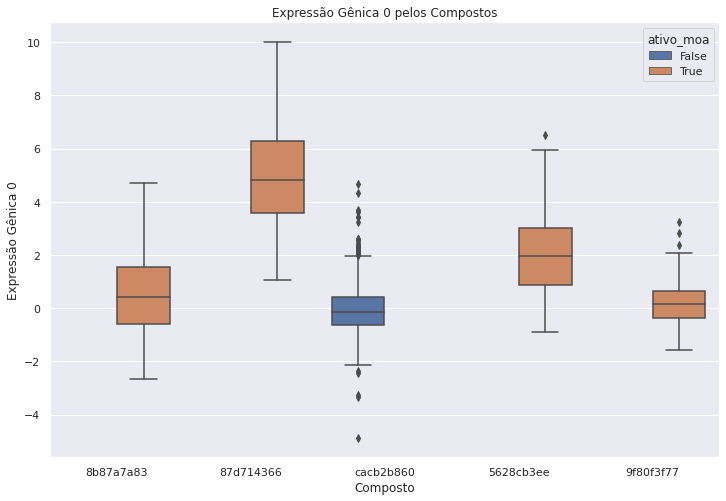

In [79]:
### Boxplot do g-0 pelos compostos e ativo_moa ###

composto_principal = dataset_merged['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(y='g-0', x='composto', data=dataset_merged.query('composto in @composto_principal'), hue='ativo_moa')

plt.title('Expressão Gênica 0 pelos Compostos')
plt.xlabel('Composto')
plt.ylabel('Expressão Gênica 0')
plt.show()

### 4.10 Análise de Correlação com Pairplot 

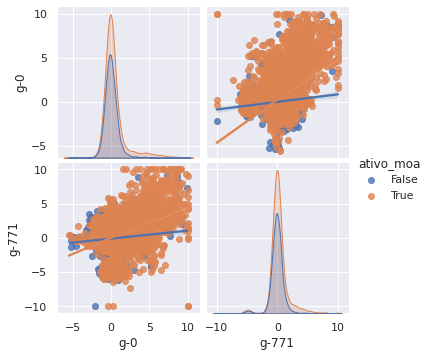

In [80]:
### EXPRESSÕES GÊNICAS ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-0', 'g-771'], kind='reg')
plt.show()

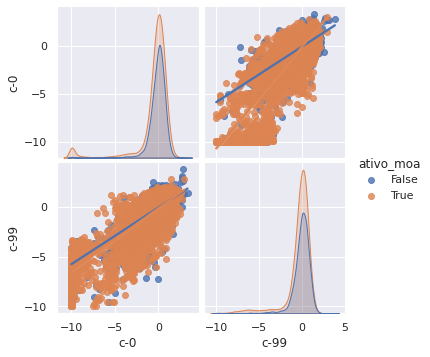

In [81]:
### VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['c-0', 'c-99'], kind='reg')
plt.show()

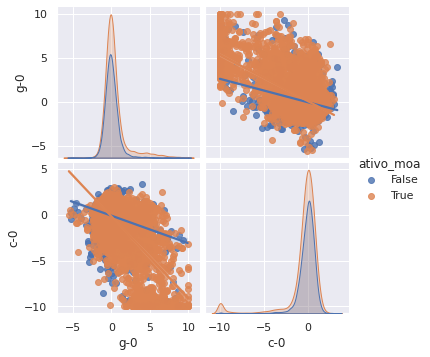

In [82]:
### EXPRESSÃO GÊNICA E VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-0', 'c-0'], kind='reg')
plt.show()

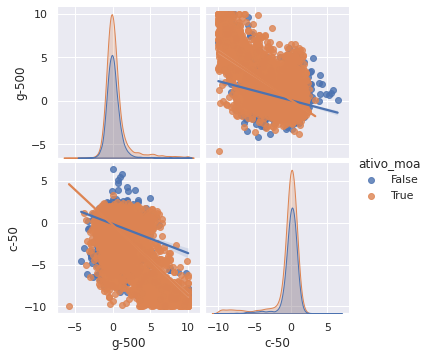

In [83]:
### EXPRESSÃO GÊNICA E VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-500', 'c-50'], kind='reg')
plt.show()

**Vemos nos 4 gráficos a dispersão entre os dados de expressões gênicas e viabilidade celular, a fim de correlacioná-los em grupos (clusters) por ativo_moa no dataset_merged.**
<br><br>
**Contudo, é possível notar que os dados, que estão divididos em se o MoA foi ativado ou não, estão demasiadamente agrupados. Ou seja, os conglomerados de dados para identificação do separador (ativo_moa) estão sobrepostos, o que poderá talvez dificultar a predição do valor (ativo_moa).**

## 5. Desenvolvimento de Modelos e Algoritmos

In [84]:
## BASE DE DADOS AGRUPADA PARA MODELOS DE MACHINE LEARNING
dataset_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


### Problema a ser solucionado
1. Tem-se a **base de dados** (dataset_merged) combinada de **experimentos** com a de **resultados** (número de MoA's e se o MoA foi ativado ou não).
2. A partir dos fatores de **expressões gênicas, viabilidade celular, tratamento, tempo e dose**, é possível determinar/prever se o **MoA foi ativado** para auxiliar no descobrimento de novos medicamentos?
3. **Sim**, este problema parace ser do tipo supervisionado, onde há rótulos para auxiliar o modelo a predizer os valores. Assim, podemos a partir da **assinatura** de cada registro, treinar um **modelo supervisionado de ML** para classificar se o **MoA foi ativado ou não** dada uma nova assinatura.
###### **PROBLEMA: Portanto, queremos descobrir se o Mecanismo de Ação foi ativado ou não (Target Array) para ajudar na descoberta de novos fármacos, dado uma determinada assinatura (Feature Matrix).**
4. Para isso, deve-se seguir os **seguintes passos** abaixo.

### 5.1 Machine Learning - Target Array: Ativação do MoA
1. Escolha uma classe de modelo importando do Scikit.
2. Escolha os hiperparâmetros do modelo instaciando a classe escolhida no Passo I.
3. Organize os dados em uma *feature matrix* e um *target array*.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.<br>
**Obs.:** Passos ensinados pelo **Prof. Ulisses Martins Dias**.

#### 5.1.1 Por Decision Tree Classifier

**O classificador por árvores de decisão utiliza uma estrutura de árvore, que consiste de um primeiro nó chamado de raiz e de vários outros nós descendentes da raiz, os quais contém uma condição que irá "filtrar" os dados.**

In [85]:
from sklearn.tree import DecisionTreeClassifier      # Passo 1: escolha do modelo
model_decisiontree = DecisionTreeClassifier()        # Passo 2: escolha dos hiperparâmetros e instanciação

**Obs: Os modelos instanciados foram utilizados sem parâmetro, para podermos comparar os resultados com o processo de hiperparametros, posteriormente.**

In [86]:
#Passo 3.1: Feature Matrix
X_moa = dataset_merged.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis=1)
X_moa = pd.get_dummies(X_moa, columns=['tratamento', 'tempo', 'dose'])
X_moa.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72,dose_D1,dose_D2
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,1,0,0,1,0
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,0,1,1,0
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0,1,0,1,0
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0,1,0,1,0
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,0,0,1,0,1


In [87]:
#Passo 3.2: Target Array
y_moa = dataset_merged.ativo_moa
y_moa.head()

0     True
1    False
2     True
3    False
4     True
Name: ativo_moa, dtype: bool

In [88]:
#Passo 3.3: Separação da Base de Dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moa, y_moa, random_state=2021, train_size=0.8)

**Os dados foram separados em 80% para treinamento e 20% para teste.**

In [89]:
#Passo 4: Ajuste o modelo aos dados
model_decisiontree.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_decisiontree = model_decisiontree.predict(X_test)

In [90]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_decisiontree = accuracy_score(y_test, y_model_decisiontree)
print('Acurácia Decision Tree: {}'.format(accuracy_decisiontree))

Acurácia Decision Tree: 0.62019735460844


#### 5.1.2 Por Naive Bayes: GaussianNB

**O classificador por Naive Bayes é do tipo probabilístico e se baseia no Teorema de Bayes. É um modelo que precisa de poucos dados para realizar a classificação.**

In [91]:
from sklearn.naive_bayes import GaussianNB     # Passo 1: escolha do modelo
model_naiveb = GaussianNB()                    # Passo 2: escolha dos hiperparâmetros e instanciação

In [92]:
#Passo 4: Ajuste o modelo aos dados
model_naiveb.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_naiveb = model_naiveb.predict(X_test)

In [93]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_naiveb = accuracy_score(y_test, y_model_naiveb)
print('Acurácia Naive Bayes: {}'.format(accuracy_naiveb))

Acurácia Naive Bayes: 0.4765903842116313


#### 5.1.3 Por Random Forest: RandomForestClassifier

**O classificador por Random Forest se trata da criação de várias árvores de decisão de forma aleatória. Assim, esse modelo exige mais poder computacional, mas pode resolver problemas mais complexos.**

In [94]:
from sklearn.ensemble import RandomForestClassifier     # Passo 1: escolha do modelo
model_randomforest = RandomForestClassifier()           # Passo 2: escolha dos hiperparâmetros e instanciação

In [95]:
#Passo 4: Ajuste o modelo aos dados
model_randomforest.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_randomforest = model_randomforest.predict(X_test)

In [96]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_randomforest = accuracy_score(y_test, y_model_randomforest)
print('Acurácia Random Forest: {}'.format(accuracy_randomforest))

Acurácia Random Forest: 0.6850724333403317


### 5.2 Hiperparâmetros

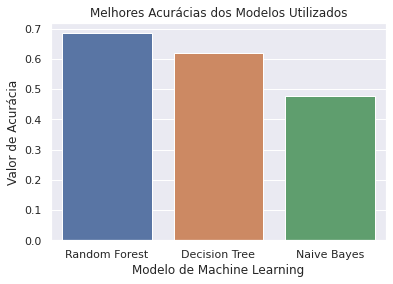

In [97]:
### Gráfico das acurácias dos modelos SEM hiperparametro ###

# Series com os valores das acurácias de cada modelo
model_accuracies = pd.Series([accuracy_decisiontree,
                              accuracy_naiveb,
                              accuracy_randomforest],
                             index=['Decision Tree', 'Naive Bayes', 'Random Forest'])
# Colocando as acurácias em ordem decrescente
model_accuracies.sort_values(ascending=False, inplace=True)
# Plotando o gráfico
sns.barplot(x=model_accuracies.index, y=model_accuracies)

plt.title('Melhores Acurácias dos Modelos Utilizados')
plt.xlabel('Modelo de Machine Learning')
plt.ylabel('Valor de Acurácia')
plt.show()

* Podemos **melhorar** os nossos modelos ajustando os seus **parâmetros**.
* Como a **base de dados** é demasiadamente **volumosa**, utiliza-se a técnica de **Random Search**, que reduz o nível de processamento dessa busca.
* A partir dos valores de **acurácia** determinados por **cada modelo**, escolheu-se o de **Decision Tree** para o processo de tuning dos hiperparâmetros, pois apesar de ser o segundo maior valor, o Random Forest requer muito **mais poder de processamento** para esta etapa. O que pode **inviabilizou** o seu uso.

#### 5.2.2 Random Search

In [98]:
## Importando o Random Search
from sklearn.model_selection import RandomizedSearchCV
## Importando o módulo para pré-processamento de dados
from sklearn.preprocessing import StandardScaler
## Importando o módulo de pipeline
from sklearn.pipeline import Pipeline
## Importando a função para determinar um intervalo de valores inteiros
from scipy.stats import randint
import numpy as np

In [99]:
## Criar Pipeline com Standard Scaler e DecisionTreeClassifier
standardScaler = StandardScaler()
model_tree = DecisionTreeClassifier()
## Pipeline com a transformação dos dados padronizados com StandardScaler
pipeline = Pipeline([('transformer', standardScaler), ('predictor', model_tree)])

## Definir intervalo de valores dos hiperparametros
param_dist = dict(
    predictor__max_depth = randint(1, 10),
    predictor__max_features = randint(32, 129),
    predictor__min_samples_leaf = randint(32, 129),
    predictor__criterion = ["gini", "entropy"]
)

## Random Search
clf = RandomizedSearchCV(pipeline, param_dist, random_state=2021, cv=5, return_train_score=True, n_iter=50, scoring='accuracy')
search = clf.fit(X_moa, y_moa)
results_RandomizedSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_

## Escolhendo o melhor resultado
print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

mean_train_score 0.69
mean_test_score 0.69


In [100]:
## Os hiperparametros do melhor resultado
results_RandomizedSearchCV['params'][indice_melhores_parametros]

{'predictor__criterion': 'entropy',
 'predictor__max_depth': 6,
 'predictor__max_features': 127,
 'predictor__min_samples_leaf': 80}

## 6. Visualização dos Dados

### 6.1 Análise dos Resultados (Matriz de Confusão)

#### 6.1.1 Decision Tree

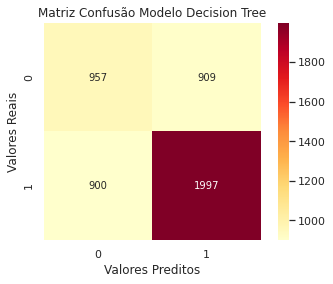

In [101]:
from sklearn.metrics import confusion_matrix
mat_decisiontree = confusion_matrix(y_test, y_model_decisiontree)

sns.heatmap(mat_decisiontree, square=True, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Matriz Confusão Modelo Decision Tree')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

**O modelo acertou corretamente 1997 + 957 dos valores preditos reais, enquanto errou 909 + 900.** <br>
**Assim, a sua acurácia é de (1997+957)/(1997+957+909+900) ~= 62%**

#### 6.1.2 Naive bayes

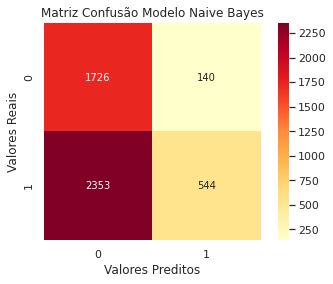

In [102]:
from sklearn.metrics import confusion_matrix
mat_naiveb = confusion_matrix(y_test, y_model_naiveb)

sns.heatmap(mat_naiveb, square=True, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Matriz Confusão Modelo Naive Bayes')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

**O modelo acertou corretamente 544 + 1726 dos valores preditos reais, enquanto errou 140 + 2353.** <br>
**Assim, a sua acurácia é de (544+1726)/(544+1726+140+2353) ~= 47%**

#### 6.1.3 Random Forest

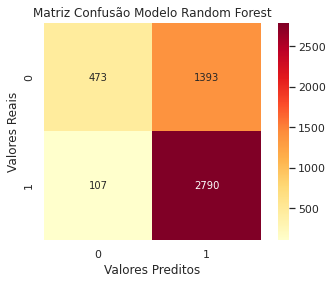

In [103]:
from sklearn.metrics import confusion_matrix
mat_randomforest = confusion_matrix(y_test, y_model_randomforest)

sns.heatmap(mat_randomforest, square=True, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Matriz Confusão Modelo Random Forest')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

**O modelo acertou corretamente 2790 + 473 dos valores preditos reais, enquanto errou 1393 + 107.** <br>
**Assim, a sua acurácia é de (2790+473)/(2790+473+1393+107) ~= 68%**

**Nota-se que o modelo de Random Forest obteve maior acurácia, pois analisando pela Matriz de Confusão, obteve mais acertos nos valores preditos que eram reais, apesar de errar "bastante" na predição de um dos valores.**

### 6.2 Métricas

#### 6.2.1 Accuracy

In [104]:
### Função de acurácia ###

### O quão frequente o classificador está correto?
# A soma de todos os valores preditos divido pelo total
def accuracy(target, prediction):
  return (target == prediction).sum()/len(target)

## Variáveis com os valores de acurácia com e sem hiperparâmetros
accuracy_com_hip = accuracy(y_moa, clf.predict(X_moa))
accuracy_sem_hip = accuracy(y_test, y_model_decisiontree)

print("Com hiperparâmetro: %f" %accuracy_com_hip)
print("Sem hiperparâmetro: %f" %accuracy_sem_hip)

Com hiperparâmetro: 0.690014
Sem hiperparâmetro: 0.620197


**Vemos que o modelo acertou cerca de 69% de todos os resultados preditos COM hiperparâmetro. Isso é o suficiente para o problema?**

#### 6.2.2 Precision

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
### Função de precisão ###

### Daqueles que classifiquei como corretos, quantos efetivamente eram?
# Valores de True-Positivo divido pela soma dos True-Positivo e False-Positive, indicando a precisão de alegar True-Positivos
def precision(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fp)

## Variáveis com os valores de precisão com e sem hiperparâmetros
precision_com_hip = precision(y_moa, clf.predict(X_moa))
precision_sem_hip = precision(y_test, y_model_decisiontree)

print("Com hiperparâmetro: %f" %precision_com_hip)
print("Sem hiperparâmetro: %f" %precision_sem_hip)

Com hiperparâmetro: 0.663217
Sem hiperparâmetro: 0.687199


**Vemos que a precisão do modelo é de 68% SEM hiperparâmetro.**
\
**Isso significa que o modelo SEM hiperparâmetro consegue predizer que o MoA foi ativado dada uma assinatura em 68% dos casos.**
#### Abaixo, verifica-se melhor os resultados da precisão com a Matriz de Confusão:

957 909 900 1997


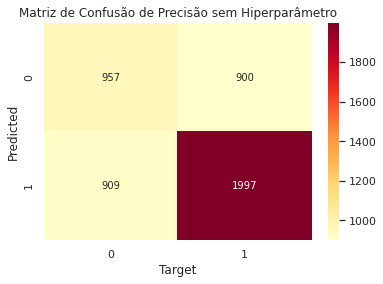

In [107]:
### Matriz de Confusão SEM hiperparametro ###
matriz_semhip = confusion_matrix(y_test, y_model_decisiontree)

## True-Negative / False-Positive / False-Negative / True-Positive
tn, fp, fn, tp = matriz_semhip.ravel()

print(tn, fp, fn, tp)

## Colocar a transposta da matriz
sns.heatmap(matriz_semhip.T, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title("Matriz de Confusão de Precisão sem Hiperparâmetro")
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

2078 7289 93 14354


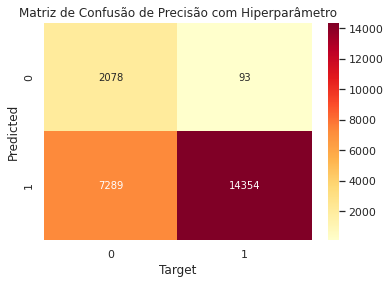

In [108]:
### Matriz de Confusão COM hiperparametro ###
matriz_comhip = confusion_matrix(y_moa, clf.predict(X_moa))

## True-Negative / False-Positive / False-Negative / True-Positive
tn, fp, fn, tp = matriz_comhip.ravel()

print(tn, fp, fn, tp)

## Colocar a transposta da matriz
sns.heatmap(matriz_comhip.T, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title("Matriz de Confusão de Precisão com Hiperparâmetro")
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

**Vemos que pela Matriz de Confusão, a precisão do modelo COM hiperparametro é menor, pois ele errou mais os resultados onde o MoA deveria ser considerado como ativado (14354 contra 1997), alegando ao invés disso, que foram NÃO ativados (7289 contra 909), consequentemente, sua precisão é menor.**

#### 6.2.3 Recall

In [109]:
### Função de recall ###

### É a frequência em que o classificador encontra os exemplos de uma classe
# Valores de True-Positivo divido pela soma dos True-Positivo e False-Negativo
def recall(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fn)

## Variáveis com os valores de recall com e sem hiperparâmetros
recall_com_hip = recall(y_moa, clf.predict(X_moa))
recall_sem_hip = recall(y_test, y_model_decisiontree)

print("Com hiperparâmetro: %f" %recall_com_hip)
print("Sem hiperparâmetro: %f" %recall_sem_hip)

Com hiperparâmetro: 0.993563
Sem hiperparâmetro: 0.689334


**Vemos que COM hiperparâmentro o recall é bem superior ao modelo SEM hiperparâmentro. Isso é explicado, pois os valores de False-Negative do modelo COM hiperparâmentro (93 contra 900) é bem menor de modo proporcional aos valores de True-Positive (14354 contra 1997)**
<br>
**Isso significa que o modelo COM hiperparâmentro consegue predizer que o MoA NÃO foi ativado dada uma assinatura em 99% dos casos.**
* O **recall** do modelo deve estar tão alto assim pela **proporção** de casos que o MoA não foi ativado com os que foram ativados. Ou seja, poderia ter ocorrido um overfit neste caso (considerando que a precisão não acompanha essa taxa tão alta)? Possivelmente...

In [110]:
print('Assinaturas com o MoA ativado: {}.'.format((dataset_merged['ativo_moa'] == True).sum()))
print('Assinaturas com o MoA NÃO ativado: {}.'.format((dataset_merged['ativo_moa'] == False).sum()))

Assinaturas com o MoA ativado: 14447.
Assinaturas com o MoA NÃO ativado: 9367.


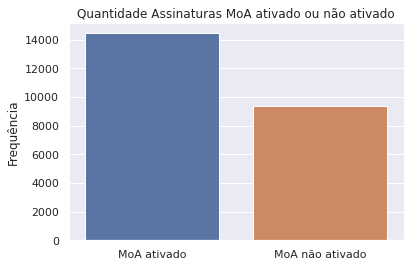

In [111]:
## Quantidades de assinaturas para MoA ativado ou não ativado no dataset_merged
assinaturas_ativo_moa = [(dataset_merged['ativo_moa'] == True).sum(), (dataset_merged['ativo_moa'] == False).sum()]
sns.barplot(x=['MoA ativado', 'MoA não ativado'], y=assinaturas_ativo_moa)

plt.title('Quantidade Assinaturas MoA ativado ou não ativado')
plt.ylabel('Frequência')
plt.show()

#### 6.2.4 Medida F1

In [112]:
### Função de medida f1 ###

### Combina precisão e recall de modo a trazer um número único que indique a qualidade geral do modelo
# Média harmônica do recall e precision
def medida_f(target, prediction):
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec + prec)

## Variáveis com os valores de medida F1 com e sem hiperparâmetros
medidaF1_com_hip = medida_f(y_moa, clf.predict(X_moa))
medidaF1_sem_hip = medida_f(y_test, y_model_decisiontree)

print("Com hiperparâmetro: %f" %medidaF1_com_hip)
print("Sem hiperparâmetro: %f" %medidaF1_sem_hip)

Com hiperparâmetro: 0.795456
Sem hiperparâmetro: 0.688265


**A média harmônica entre o recall e precision indica a qualidade geral do modelo.**
\
**Assim, vemos que COM hiperparametro, a qualidade geral do modelo é melhor (79%). Mas é o suficiente para a solução do problema?**

#### 6.2.5 Specificity

In [113]:
### Função de especificidade ###

### A capacidade do sistema em predizer corretamente a ausência da condição para casos que realmente não a têm
# Valores de True-Negative divido pela soma dos total de negativos
def specificity(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn + fp)

## Variáveis com os valores de especificidade com e sem hiperparâmetros
specificity_com_hip = specificity(y_moa, clf.predict(X_moa))
specificity_sem_hip = specificity(y_test, y_model_decisiontree)

print("Com hiperparâmetro: %f" %specificity_com_hip)
print("Sem hiperparâmetro: %f" %specificity_sem_hip)

Com hiperparâmetro: 0.221843
Sem hiperparâmetro: 0.512862


**A especificidade é a capacidade do modelo em predizer corretamente a ausência da condição para casos que realmente não a têm.**
\
**Assim, vemos que SEM hiperparamentro, essa capacidade do modelo é mediana (51%). Deveríamos ter uma especificidade maior para o problema?**

## 7. Tomada de Decisão

### 7.1 Análise das Métricas

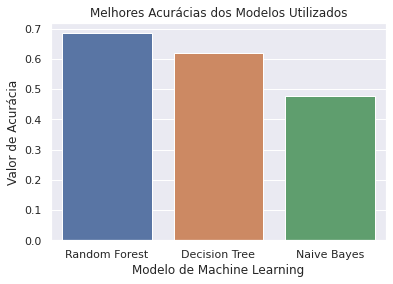

In [114]:
### Gráfico das acurácias dos modelos SEM hiperparametro ###

# Series com os valores das acurácias de cada modelo
model_accuracies = pd.Series([accuracy_decisiontree,
                              accuracy_naiveb,
                              accuracy_randomforest],
                             index=['Decision Tree', 'Naive Bayes', 'Random Forest'])
# Colocando as acurácias em ordem decrescente
model_accuracies.sort_values(ascending=False, inplace=True)
# Plotando o gráfico
sns.barplot(x=model_accuracies.index, y=model_accuracies)

plt.title('Melhores Acurácias dos Modelos Utilizados')
plt.xlabel('Modelo de Machine Learning')
plt.ylabel('Valor de Acurácia')
plt.show()

In [115]:
## Acurácia modelo Random Forest sem hiperparâmetros
print('Acurácia Random Forest: {}'.format(accuracy_randomforest))

Acurácia Random Forest: 0.6850724333403317


In [116]:
## Acurácia modelo Decision Tree com hiperparâmetros
print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.4f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.4f}")

mean_train_score 0.6894
mean_test_score 0.6877


**Aqui vemos que nos modelos sem hiperparâmentros, o modelo de Random Forest obteve a maior acurácia entre os demais. Contudo, escolhemos o modelo de Decision Tree por exigir menos poder computacional e por estar próximo ao Random Forest. Vemos até que com hiperparâmetros, o modelo de Decision Tree superou o de Random Forest sem hiperparâmetros.**

In [117]:
### Gráfico com as medidas de cada métrica ###

# Tabela com os valores, tipos e se foi sem ou com hiperparamentro de cada métrica empregada
df_metrics = pd.DataFrame(
    {
        'hiperparametro': ['com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip'],
        'metricas': [accuracy_com_hip, accuracy_sem_hip,
                      precision_com_hip, precision_sem_hip,
                      recall_com_hip, recall_sem_hip,
                      medidaF1_com_hip, medidaF1_sem_hip,
                      specificity_com_hip, specificity_sem_hip],
        'tipo_metrica': ['accuracy', 'accuracy', 'precision', 'precision', 'recall', 'recall', 'medida_F1', 'medida_F1', 'specificity', 'specificity']
    }
)

df_metrics

,hiperparametro,metricas,tipo_metrica
0,com_hip,0.690014,accuracy
1,sem_hip,0.620197,accuracy
2,com_hip,0.663217,precision
3,sem_hip,0.687199,precision
4,com_hip,0.993563,recall
5,sem_hip,0.689334,recall
6,com_hip,0.795456,medida_F1
7,sem_hip,0.688265,medida_F1
8,com_hip,0.221843,specificity
9,sem_hip,0.512862,specificity


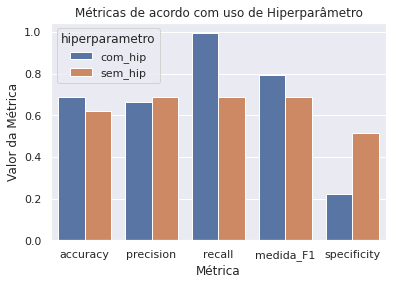

In [118]:
sns.barplot(x='tipo_metrica', y='metricas', hue='hiperparametro', data=df_metrics)

plt.title('Métricas de acordo com uso de Hiperparâmetro')
plt.xlabel('Métrica')
plt.ylabel('Valor da Métrica')
plt.show()

**De modo geral, vemos que com hiperparâmetros, o modelo se saiu melhor em determinadas métricas. Mas quais delas importam mais para o nosso problema? Para isso devemos responder a algumas perguntas levantadas:**
<br><br>
**Do que se trata o problema?**
<br>
O problema consiste em identificar se o Mecanismo de Ação foi ativado ou não dada uma assinatura.
<br><br>
**Um resultado positivo significa o que?**
<br>
Um resultado positivo significa que o MoA foi ativado.
<br><br>
**Um resultado negativo significa o que?**
<br>
Um resultado positivo significa que o MoA não foi ativado.
<br><br>
**O que implica se o MoA foi ativado?**
<br>
Se o MoA foi ativado, significa que algum efeito farmacológico será produzido.
<br><br>
**O que implica se o MoA não foi ativado?**
<br>
Se o MoA não foi ativado, significa que nenhum efeito farmacológico será produzido.
<br><br>
**O modelo do problema precisa estar frequentemente correto?**
<br>
Sim, pois como queremos descobrir novos medicamentos que possam ser utilizados para tratar sintomas ou doenças, assim queremos garantir que o medicamente seja eficaz.
<br><br>
**O modelo do problema precisa ser preciso?**
<br>
Sim, pois por talvez questões de segurança da disponibilização do possível medicamento, queremos que o modelo prediza corretamente quais MoA's foram ativados.
<br><br>
**O modelo do problema precisa ter uma boa revocação?**
<br>
Sim, pois não tento uma boa revocação implica dizer que um MoA que foi ativado será classificado como não ativado pelo modelo. Assim, este possivelmente será descartado, porém poderia ser a solução para o tratamento de um sintoma/doença.
<br><br>
**O modelo do problema precisa ter uma boa qualidade geral?**
<br>
Sim, pois devemos nos certificar que os MoA's foram de fato ativados ou não. Podendo ser a solução de um tratamento ou comprometer a saúde do paciente.
<br><br>
**O modelo do problema precisa ter uma boa especificidade?**
<br>
Acredito que não seja uma prioridade, não ter uma boa especificidade implica dizer que é a porcentagem de amostras negativas identificadas corretamente sobre o total de amostras de negativas. Ou seja, seria a capacidade de identificar quantos MoA's não ativados foram classificados pelo modelo sobre o todo de MoA's não ativados.

### 7.2 Conclusões

**Resumo**
1. Primeiro, definimos uma metodologia a ser seguida.
2. Pesquisamos mais sobre a área de Drug Discovery.
3. Selecionamos as principais perguntas sobre as bases de dados relacionada a área.
4. Entendemos melhor os dados contidos nas bases de dados.
5. Escolhemos os melhores modelos para a solução do problema.
6. Realizamos o ajuste dos modelos com técnicas de hiperparâmetros.
7. Analisamos os resultados com a Matriz de Confusão e Métricas.
8. Respondemos à perguntas que destinam para a solução do problema definido de acordo com as análises.

**Considerações Finais**
<br>
**1. Com isso, percebemos que nosso problema em questões de métricas, precisa ter boa acurácia, precisão, recall e média harmônica. Pois o descobrimento de novos medicamentos na área de Drug Discovery implica nos efeitos que tais fármacos irão afetar nos pacientes, como também a descoberta desses possíveis compostos.**
<br><br>
**2. Notamos que o modelo de Decision Tree Classifier com hiperparâmetros se demonstrou o mais adequado. Contudo, não o suficiente para as questões levantadas com a análise das métricas para a área de Drug Discovery.**
<br><br>
**3. Vemos o melhor valor de acúracia em torno de 68%, de média harmônica em torno de 79%, etc. Valores muito abaixo para se ter um nível de confiança seguro para a área de Drug Discovery.**
<br><br>
**4. Verificamos antes da definição dos modelos e algoritmos, nos gráficos de Pairplot, que seria complicado de conseguir separar o se o MoA foi ativado ou não. Assim, esses valores das métricas não são tão surpreendentes, talvez já esperaríamos por esses resultados anteriormente.**
<br><br>
**5. Mesmo o modelo não podendo ser possivelmente utilizado para a descoberta de novos medicamentos. Será que existem outros fatores que outros modelos possam auxiliar no processo de Drug Discovery?**
<br><br>
**6. Torna-se possível que algumas das análises esteja um pouco equivocada, o assunto de Drug Discovery é muito vasto e multidisciplinar, mas acredita-se que está condizente na maior parte.**
<br><br>
**7. Tive algumas dificuldades com Storytelling, acho que meu fluxo explicativo no âmbito de extrair informações e contá-las ao interlocutor ainda precisa ser melhorado. Entretanto, tentei direcionar os acontecimentos do melhor jeito que achei.**
<br><br>
Agredeço ao time da **Alura** por essa **Imersão de Dados** gratuita, gostei bastante do desafio e consegui tentar melhorar minhas habilidades de análise de dados com este projeto. Ainda estou aprendendo, mas espero poder contribuir profissionalmente sendo um **Data Scientist** futuramente!